In [1]:
from google.colab import files
uploaded = files.upload()

Saving Bitcoin_Historical_Data.csv to Bitcoin_Historical_Data.csv


In [2]:
import pandas as pd
bh = pd.read_csv('Bitcoin_Historical_Data.csv')
bh.head()


,Date,Adj Close,Close,High,Low,Open,Volume
0,2014-09-17 00:00:00+00:00,457.334015,457.334015,468.174011,452.421997,465.864014,21056800
1,2014-09-18 00:00:00+00:00,424.440002,424.440002,456.859985,413.104004,456.859985,34483200
2,2014-09-19 00:00:00+00:00,394.795990,394.795990,427.834991,384.532013,424.102997,37919700
3,2014-09-20 00:00:00+00:00,408.903992,408.903992,423.295990,389.882996,394.673004,36863600
4,2014-09-21 00:00:00+00:00,398.821014,398.821014,412.425995,393.181000,408.084991,26580100


In [3]:
bh.info()

bh.describe()

bh.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3724 entries, 0 to 3723
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3724 non-null   object 
 1   Adj Close  3724 non-null   float64
 2   Close      3724 non-null   float64
 3   High       3724 non-null   float64
 4   Low        3724 non-null   float64
 5   Open       3724 non-null   float64
 6   Volume     3724 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 203.8+ KB


,0
Date,0
Adj Close,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [4]:
bh.dropna(inplace=True)



In [5]:
bh.drop_duplicates(inplace=True)


In [6]:
print(bh.head())

print(bh.info())

print(bh.describe())

print(bh.isnull().sum())

print(f'Duplicados: {bh.duplicated().sum()}')



                        Date   Adj Close       Close        High         Low  \
0  2014-09-17 00:00:00+00:00  457.334015  457.334015  468.174011  452.421997   
1  2014-09-18 00:00:00+00:00  424.440002  424.440002  456.859985  413.104004   
2  2014-09-19 00:00:00+00:00  394.795990  394.795990  427.834991  384.532013   
3  2014-09-20 00:00:00+00:00  408.903992  408.903992  423.295990  389.882996   
4  2014-09-21 00:00:00+00:00  398.821014  398.821014  412.425995  393.181000   

         Open    Volume  
0  465.864014  21056800  
1  456.859985  34483200  
2  424.102997  37919700  
3  394.673004  36863600  
4  408.084991  26580100  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3724 entries, 0 to 3723
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3724 non-null   object 
 1   Adj Close  3724 non-null   float64
 2   Close      3724 non-null   float64
 3   High       3724 non-null   float64
 4   Low        3

In [7]:
numeric_bh = bh.select_dtypes(include=['float64', 'int64'])

if not numeric_bh.empty:
    print("Correlaciones entre variables numéricas:")
    print(numeric_bh.corr())
else:
    print("No hay columnas numéricas en la data para calcular correlaciones.")


Correlaciones entre variables numéricas:
           Adj Close     Close      High       Low      Open    Volume
Adj Close   1.000000  1.000000  0.999599  0.999486  0.999025  0.654523
Close       1.000000  1.000000  0.999599  0.999486  0.999025  0.654523
High        0.999599  0.999599  1.000000  0.999183  0.999551  0.661160
Low         0.999486  0.999486  0.999183  1.000000  0.999324  0.645355
Open        0.999025  0.999025  0.999551  0.999324  1.000000  0.654951
Volume      0.654523  0.654523  0.661160  0.645355  0.654951  1.000000


In [ ]:
bh['Date'] = pd.to_datetime(bh['Date'], errors='coerce')

print(bh['Date'].isnull().sum())



0


In [8]:
bh['Date'] = pd.to_datetime(bh['Date'], errors='coerce')

print(bh['Date'].isnull().sum())


0


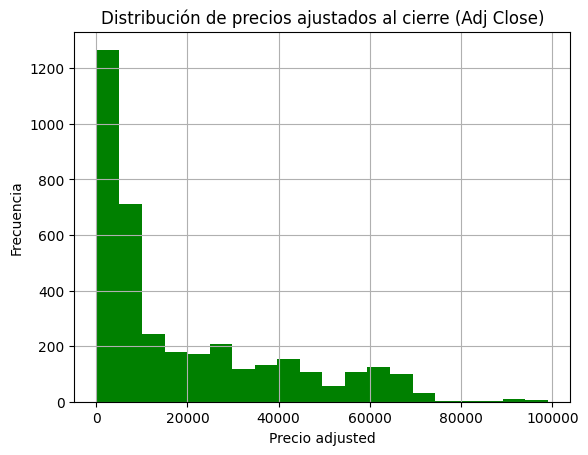

In [9]:
import matplotlib.pyplot as plt

bh['Adj Close'].hist(bins=20, color='green')
plt.title('Distribución de precios ajustados al cierre (Adj Close)')
plt.xlabel('Precio adjusted')
plt.ylabel('Frecuencia')
plt.show()


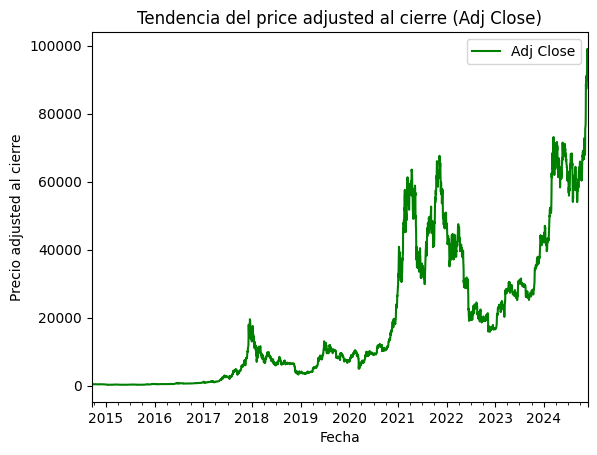

In [10]:
bh.plot(x='Date', y='Adj Close', kind='line', color='green')
plt.title('Tendencia del price adjusted al cierre (Adj Close)')
plt.xlabel('Fecha')
plt.ylabel('Precio adjusted al cierre')
plt.show()


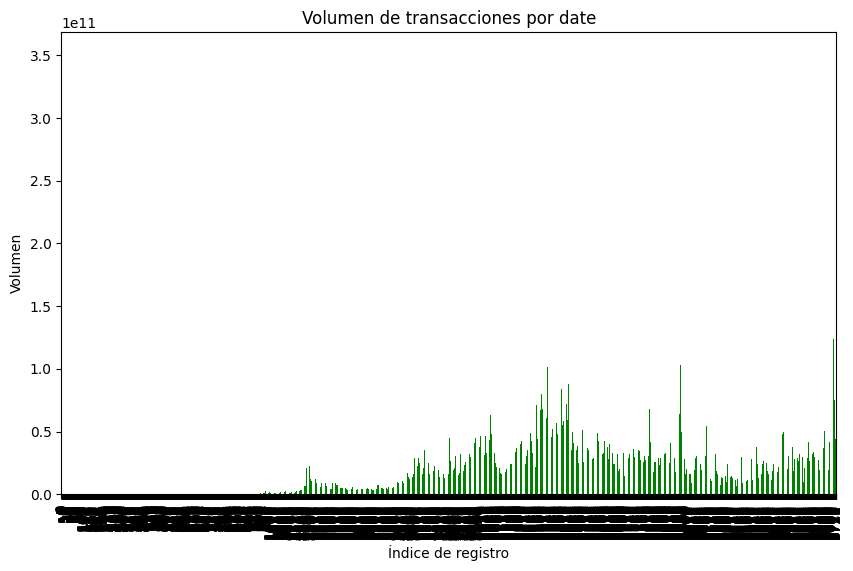

In [11]:
# Gráfico de barras
bh['Volume'].plot(kind='bar', figsize=(10, 6), color='green')
plt.title('Volumen de transacciones por date')
plt.xlabel('Índice de registro')
plt.ylabel('Volumen')
plt.show()


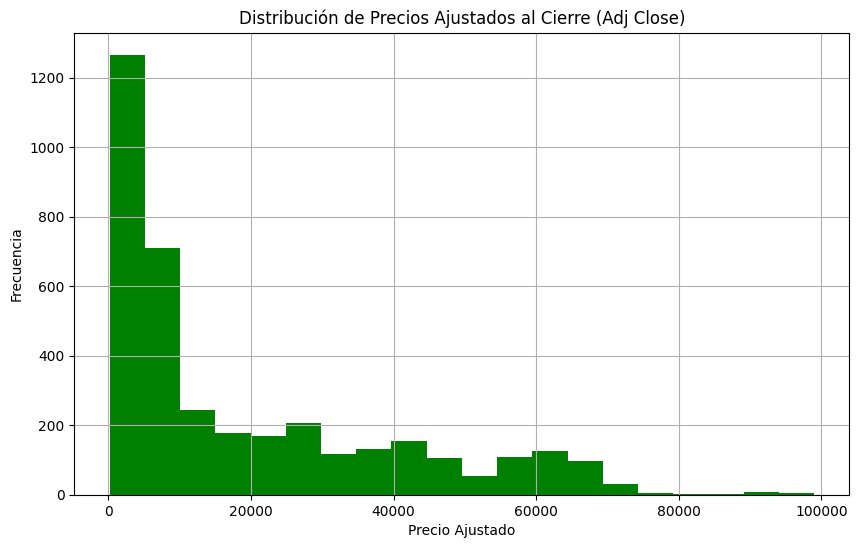

In [12]:
# Histograma
bh['Adj Close'].hist(bins=20, figsize=(10, 6), color='green')
plt.title('Distribución de Precios Ajustados al Cierre (Adj Close)')
plt.xlabel('Precio Ajustado')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

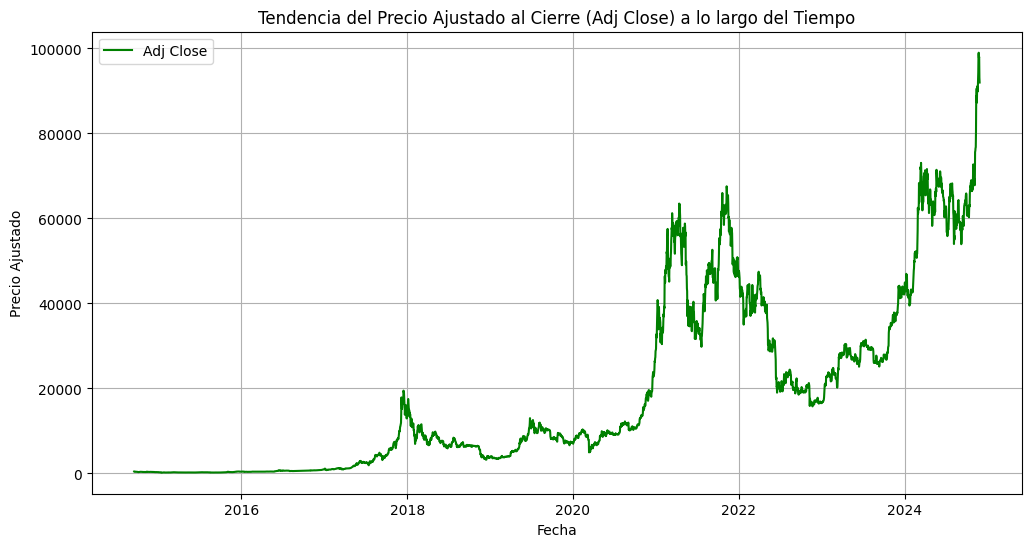

In [14]:
# Gráfico de líneas para el price adjusted
plt.figure(figsize=(12, 6),)
plt.plot(bh['Date'], bh['Adj Close'], label='Adj Close', color='green')
plt.title('Tendencia del Precio Ajustado al Cierre (Adj Close) a lo largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio Ajustado')
plt.legend()
plt.grid(True)
plt.show()


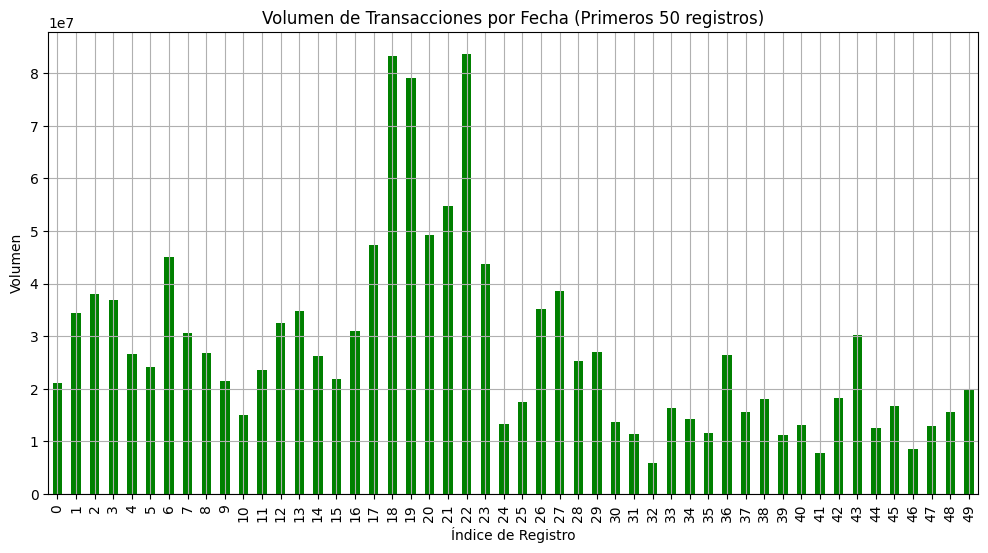

In [15]:
# Gráfico de barras
bh['Volume'][:50].plot(kind='bar', figsize=(12, 6), color='green')
# Usamos los primeros 50 registros para evitar saturación
plt.title('Volumen de Transacciones por Fecha (Primeros 50 registros)')
plt.xlabel('Índice de Registro')
plt.ylabel('Volumen')
plt.grid(True)
plt.show()


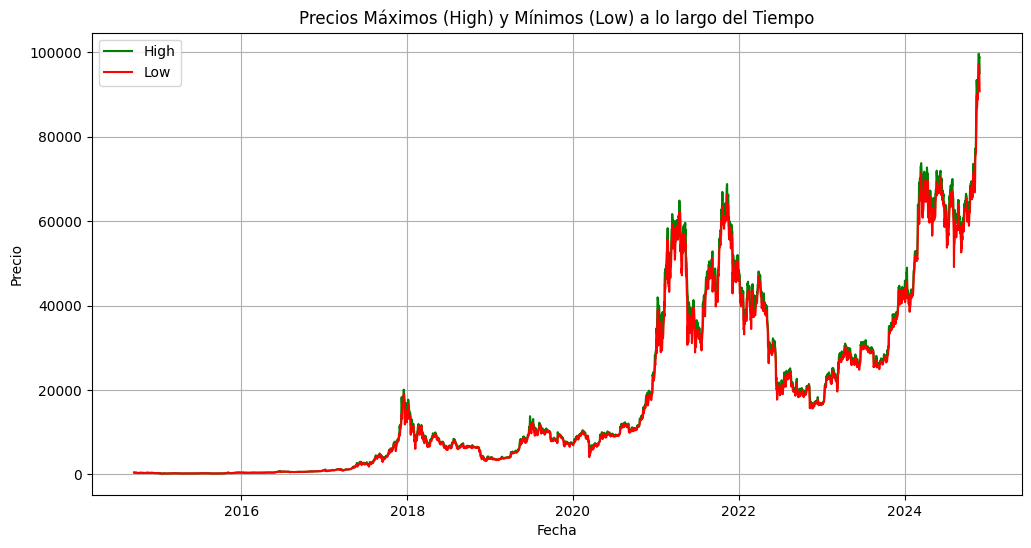

In [ ]:
# Gráfico de línea para precios altos y bajos
plt.figure(figsize=(12, 6))
plt.plot(bh['Date'], bh['High'], label='High', color='green')
plt.plot(bh['Date'], bh['Low'], label='Low', color='red')
plt.title('Precios Máximos (High) y Mínimos (Low) a lo largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()
